In [1]:
import pandas as pd

# Anomaly Detection

In [3]:
df = pd.read_json('anomaly_detection/results/aucs.json')
df = df.drop(index='catch')
df = df.round(3)

#ranks = df.rank(axis=0, method='min', ascending=False)
#mean_ranks = ranks.mean(axis=1)

#df['mean'] = df.mean(axis=1)
#df = df.round(3)
#df['mean_rank'] = mean_ranks
#df.sort_values('mean_rank', inplace=True)
df

,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd
aelstm,0.664,0.998,0.612,0.840,0.618,0.828
anotrans,0.491,0.994,0.553,0.819,0.621,0.678
patchtst,0.696,0.999,0.626,0.843,0.622,0.882
usad,0.669,0.977,0.684,0.255,0.547,0.605
lstm,0.511,0.999,0.595,0.842,0.604,0.833
tranad,0.551,0.967,0.644,0.815,0.581,0.884
patchtrad,0.922,0.999,0.661,0.845,0.660,0.869
patchad,0.972,0.998,0.622,0.822,0.671,0.818
madgan,0.782,0.011,0.460,0.791,0.568,0.708
drocc,0.529,0.886,0.593,0.751,0.705,0.638


In [4]:
df = df.loc[df.index.astype(str).str.contains("jepatchtrad"), :]
ranks = df.rank(axis=0, method='min', ascending=False)
mean_ranks = ranks.mean(axis=1)

df['mean'] = df.mean(axis=1)
df = df.round(3)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)
df

/tmp/ipykernel_1167250/1686646016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df.mean(axis=1)


,nyc_taxi,ec2_request_latency_system_failure,msl,swat,smap,smd,mean,mean_rank
jepatchtrad,0.848,0.994,0.630,0.815,0.689,0.859,0.806,1.166667
jepatchtrad_forecast,0.636,0.999,0.623,0.810,0.640,0.838,0.758,1.833333


# Forecasting

In [5]:
df = pd.read_json('forecasting/results/mse.json')
df = df.round(4)

ranks = df.rank(axis=0, method='min', ascending=True)
mean_ranks = ranks.mean(axis=1)
df['mean_rank'] = mean_ranks
df.sort_values('mean_rank', inplace=True)

df["encoder"]=" "
df["scratch"]=" "

for i in range(len(df)):
    index_name = df.index[i]
    index_name_split = index_name.split("_")
    
    if index_name_split[-1]=="revin":
        index_name_split = [index_name_split[0], index_name_split[-1], index_name_split[1], index_name_split[2]]

    if index_name_split[-1]=="True":
        df.at[index_name, "scratch"] = "True"
        df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "PatchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
    else:
        if index_name_split[-2]=="True":
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "freeze"
        else:
            df.at[index_name, "scratch"] = "False"
            df.at[index_name, "encoder"] = "trainable"
        df.index.values[i] = "JEPAtchTST"
        if index_name_split[1]=="revin":
            df.index.values[i] += "_Revin"
df.T

,JEPAtchTST_Revin,PatchTST_Revin,JEPAtchTST_Revin,JEPAtchTST,PatchTST,JEPAtchTST
etth1,0.4501,0.442,0.4577,0.428,0.449,0.4527
etth2,0.1897,0.1934,0.1886,0.2306,0.2326,0.1938
ettm1,0.406,0.3984,0.417,0.4167,0.4121,0.413
ettm2,0.1179,0.1149,0.1185,0.1228,0.124,0.1445
weather,0.165,0.1655,0.1682,0.1852,0.1813,0.2039
etth1_univariate,0.1073,0.1095,0.1081,0.1315,0.1235,0.1612
etth2_univariate,0.2575,0.2715,0.2544,0.2849,0.316,0.301
ettm1_univariate,0.0457,0.0446,0.0461,0.0489,0.0551,0.0657
ettm2_univariate,0.1162,0.117,0.1241,0.13,0.1419,0.1861
national_illness_univariate,1.1517,2.147,2.3471,4.2762,4.4589,3.692


# Classification

### Artificial Signals

In [7]:
df = pd.read_json('classification/type1/results/accs.json')


name_map = {
    "JePatchTST_True_True": "scratch",
    "JePatchTST_True_False": "freeze",
    "JePatchTST_False_False": "finetune"
}

df = df.rename(index=name_map)
df = df.round(3)
df.T

,scratch,freeze,finetune
signals_classification,0.74,0.8,0.907


## True Signals

In [9]:
df = pd.read_json('classification/type2/results/accs.json')

name_map = {
    "JePatchTST_True_True": "scratch",
    "JePatchTST_True_False": "freeze",
    "JePatchTST_False_False": "finetune"
}

df = df.rename(index=name_map)
df = df.round(3)
df.T

,scratch,freeze,finetune
signals_classification,0.554,0.773,0.897


## Forecasting varying sizes

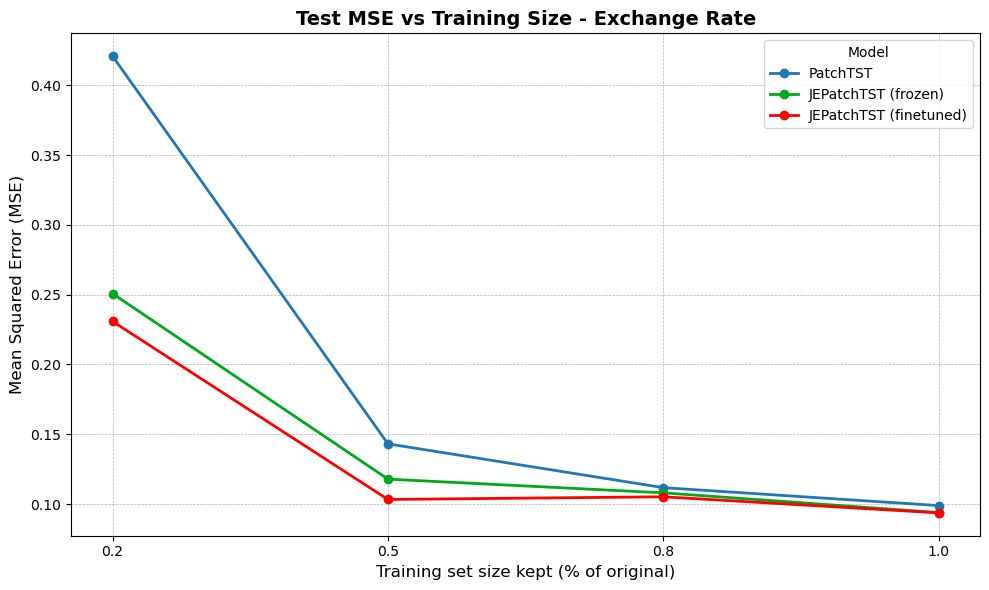

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('forecasting/results/mse_vary.json')

label_mapping = {
    "JePatchTST_True_True_revin": "PatchTST",
    "JePatchTST_True_False_revin": "JEPatchTST (frozen)",
    "JePatchTST_False_False_revin": "JEPatchTST (finetuned)",
}
colors = {
    "JePatchTST_True_True_revin": "#1f77b4",
    "JePatchTST_True_False_revin": "#00a81c",
    "JePatchTST_False_False_revin": "#ff0000",
}

DATASET="exchange_rate"

cols = df.columns.astype(str).str.contains(DATASET)
subdf = df.loc[:, cols].copy()
subdf.columns = subdf.columns.str.replace(DATASET, "", regex=False)
fig, ax = plt.subplots(figsize=(10, 6))

for model in subdf.index:
    label = label_mapping.get(model, model)
    ax.plot(subdf.columns, subdf.loc[model], marker='o', linewidth=2, label=label, color=colors.get(model, "#000000"))
ax.set_xlabel('Training set size kept (% of original)', fontsize=12)
ax.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax.set_title(f'Test MSE vs Training Size - {DATASET.replace("_", " ").title()}', fontsize=14, weight='bold')
ax.legend(title="Model", fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
from forecasting.dataset import TSDataset

for path in ["ETTh1", "ETTh2", "ETTm1", "ETTm2", "exchange_rate", "national_illness", "weather"]:
    path_full = f"forecasting/data/{path}.csv"
    trainset = TSDataset(
        path=path_full,
        seq_len=100,
        target_len=96,
        mode="train",
        univariate=True,
        target="OT"
    )
    print(path, len(trainset))

ETTh1 11999
ETTh2 11999
ETTm1 48581
ETTm2 48581
exchange_rate 5116
national_illness 481
weather 36692
